# Lab | Random variable distributions

Instructions

    Get the numerical variables from our dataset.
    Check using a distribution plot if the variables fit the theoretical normal or exponential distribution.
    Check if any of the transformations (log-transform, etc.) we have seen up to this point changes the result.

In [1]:
import pandas as pd
import numpy as np
import datetime
import warnings

warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

%matplotlib inline

pd.set_option('display.max_columns', None)

In [3]:
customer_df = pd.read_csv('files_for_lab/we_fn_use_c_marketing_customer_value_analysis.csv') 

In [7]:
#Get the numerical variables from our dataset

numericals=customer_df.select_dtypes(np.number)

Customer Lifetime Value


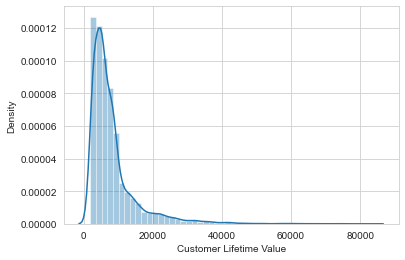

Income


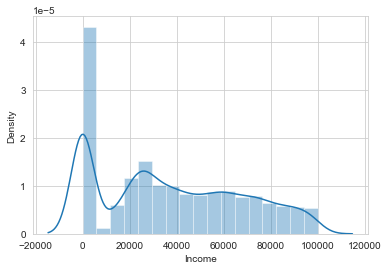

Monthly Premium Auto


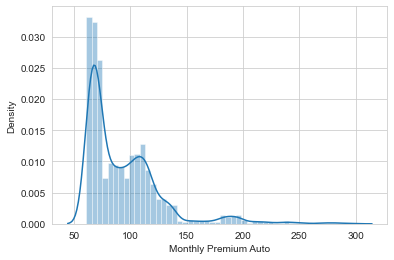

Months Since Last Claim


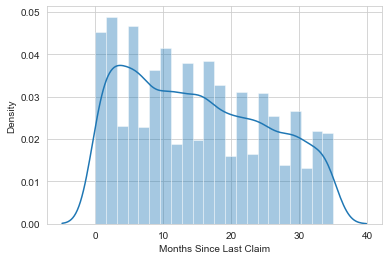

Months Since Policy Inception


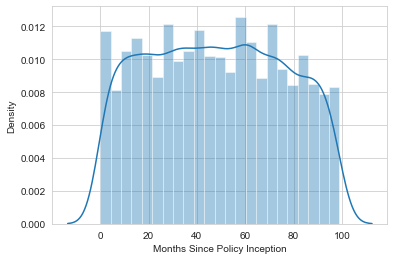

Number of Open Complaints


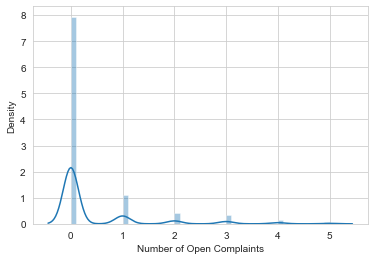

Number of Policies


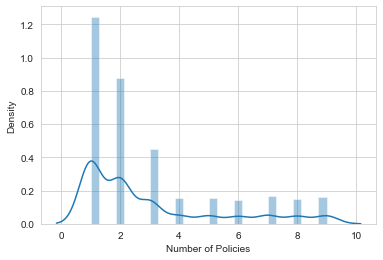

Total Claim Amount


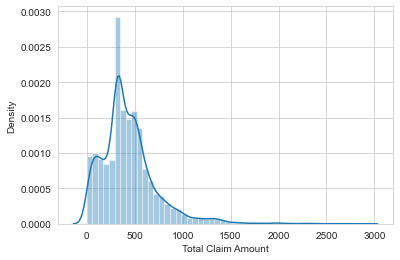

In [9]:
#Check using a distribution plot if the variables fit the theoretical normal or exponential distribution.

for i in numericals.columns:
    print(i)
    sns.distplot(numericals[i])
    plt.show()

In [10]:
#Check if any of the transformations (log-transform, etc.) we have seen up to this point changes the result.

In [12]:
def skew_df(df):
    from scipy.stats import skew
    
    cols=list(df.columns)
    
    for col in cols:
        sk=df[col].skew()
        print("the skew of {} is: {}".format(col,sk)) 

In [13]:
skew_df(numericals)

the skew of Customer Lifetime Value is: 3.0322802599299847
the skew of Income is: 0.28688727581189166
the skew of Monthly Premium Auto is: 2.1235464499475345
the skew of Months Since Last Claim is: 0.2785863118107981
the skew of Months Since Policy Inception is: 0.040164961597799524
the skew of Number of Open Complaints is: 2.783263052399567
the skew of Number of Policies is: 1.2533327352739663
the skew of Total Claim Amount is: 1.7149658097209557


In [14]:
def log_transfom_clean_(x):
    if np.isfinite(x) and x!=0: # If the value is finite and != 0...
        return np.log(x)
    else:
        return np.NAN # We are returning NaNs so that we can replace them later

Customer Lifetime Value


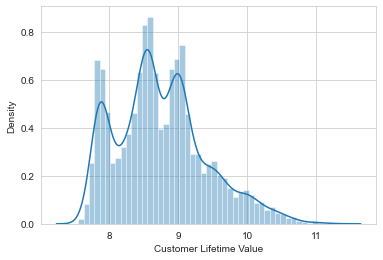

Income


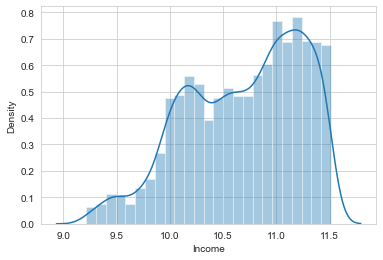

Monthly Premium Auto


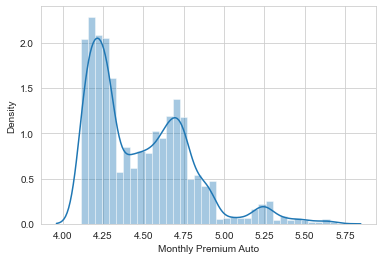

Months Since Last Claim


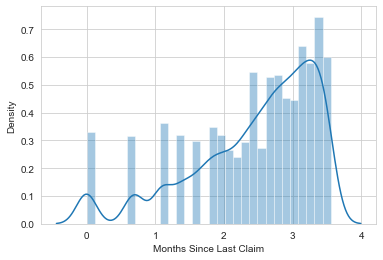

Months Since Policy Inception


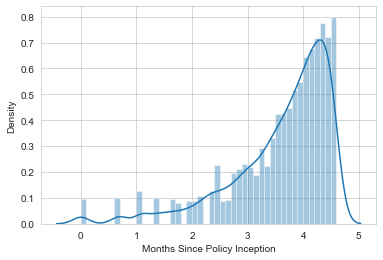

Number of Open Complaints


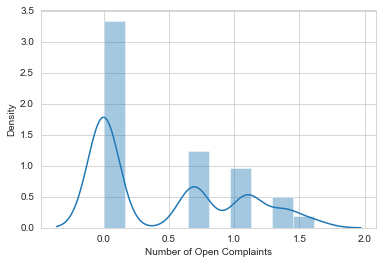

Number of Policies


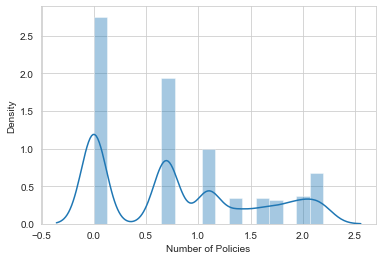

Total Claim Amount


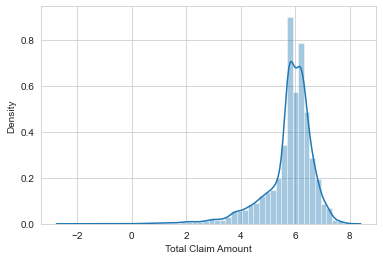

In [17]:
for i in numericals.columns:
    numericals[i] = list(map(log_transfom_clean_, numericals[i]))
    print(i)
    sns.distplot(numericals[i])
    plt.show()

In [19]:
numericals2=customer_df.select_dtypes(np.number)

Customer Lifetime Value


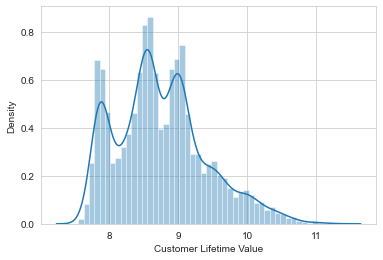

Income


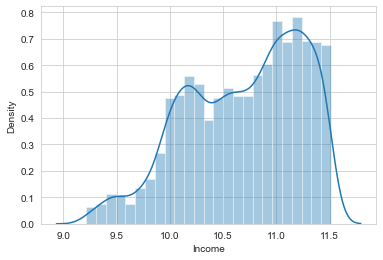

Monthly Premium Auto


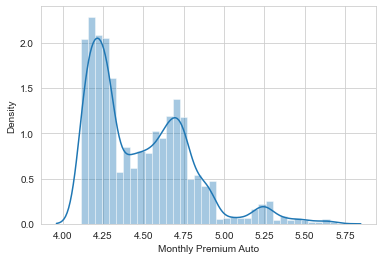

Months Since Last Claim


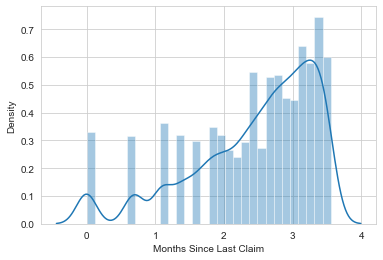

Months Since Policy Inception


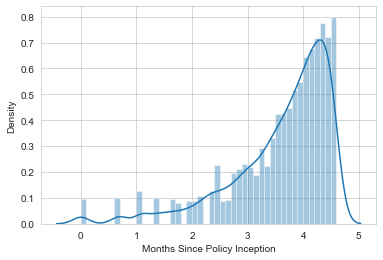

Number of Open Complaints


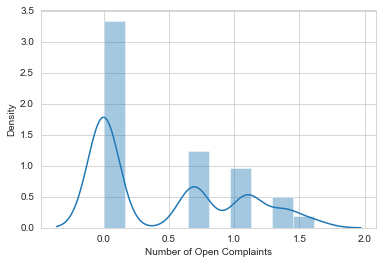

Number of Policies


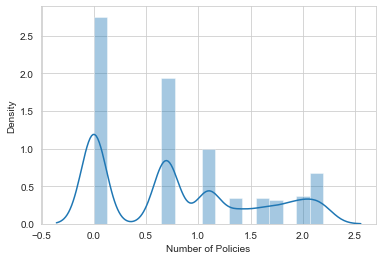

Total Claim Amount


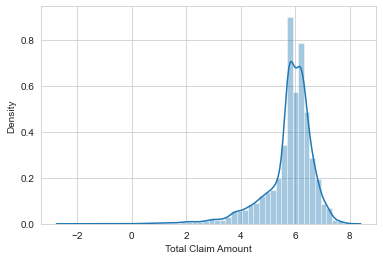

In [25]:
from scipy.stats import boxcox
import matplotlib.pyplot as plt

for i in numericals2:
    numericals2[i] = numericals2[i].apply(lambda x: x+1)

for i in numericals.columns:
    numericals2[i],lambd = boxcox(numericals2[i])
    print(i)
    sns.distplot(numericals[i])
    plt.show()

In [26]:
def boxcox(numericals2): 
    from scipy.stats import boxcox
    import matplotlib.pyplot as plt

    for i in numericals2:
        numericals2[i] = numericals2[i].apply(lambda x: x+1)

    for i in numericals.columns:
        numericals2[i],lambd = boxcox(numericals2[i])
        print(i)
        sns.distplot(numericals[i])
        plt.show()
        
    return numericals2